# Banco de Grafos

### Objetivo
Definir banco de dados para a empresa analisar recomendações baseadas nas conexões entre clientes e produtos comprados.

## Banco de Dados Escolhido
### Neo4j
O Neo4j foi selecionado para o motor de recomendações devido à sua habilidade nativa de gerenciar relacionamentos complexos como dados de primeira classe. Em um cenário de e-commerce, entender as conexões entre o que um cliente compra e o que outros clientes similares também adquiriram é muito mais eficiente em grafos do que em tabelas relacionais. Além disso, o Neo4j oferece:

* **Performance em Consultas de Relacionamento** 
    * Enquanto no SQL seriam necessários múltiplos JOINs custosos, o Neo4j percorre os nós (clientes e produtos) de forma extremamente rápida, independentemente da profundidade da conexão.
* **Modelagem Intuitiva de Rede**
    * Permite visualizar e armazenar os dados exatamente como eles ocorrem na vida real: (Cliente)–[COMPROU]→(Produto), facilitando a criação de algoritmos de recomendação "quem comprou este item também comprou...".
* **Flexibilidade de Atributos**
    * Assim como em outros NoSQL, é possível adicionar novas propriedades aos nós ou às relações (como a data da compra ou a nota de avaliação) sem alterar a estrutura do banco.
* Linguagem Cypher
    * Utiliza uma linguagem de consulta declarativa poderosa e legível, focada em padrões de caminhos, o que simplifica a extração de insights sobre o comportamento do consumidor.

### Exemplo de Utilização
O exemplificar a utilização do Neo4j, vamos utilizar `networkx` que é uma biblioteca poderosa para representar grafos. Ele simula o comportamento de bancos como o **Neo4j**, permitindo modelar **nós e arestas** com muita flexibilidade.


In [ ]:
# Instalando networkx
%pip install networkx

In [2]:
# Importando as bibliotecas
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Criando um grafo direcionado para representar as ações (ex: comprou, visualizou)
G = nx.DiGraph()

In [4]:
# Adicionando Clientes
clientes = [
    ("Maria Silva", {"tipo": "cliente"}), 
    ("Carlos Oliveira", {"tipo": "cliente"}), 
    ("Joana Souza", {"tipo": "cliente"}),
    ("Diogo Santos", {"tipo": "cliente"})
    ]
G.add_nodes_from(clientes)

# Adicionando Produtos
produtos = [
    ("Mouse sem fio", {"tipo": "produto"}), 
    ("Teclado mecânico", {"tipo": "produto"}), 
    ("Monitor 24pol", {"tipo": "produto"}),
    ("Cabo HDMI 2m", {"tipo": "produto"})
    ]
G.add_nodes_from(produtos)

# Adicionando Relacionamentos (Compras)
G.add_edges_from([
    ("Maria Silva", "Mouse sem fio", {"acao": "comprou"}),
    ("Carlos Oliveira", "Monitor 24pol", {"acao": "comprou"}),
    ("Joana Souza", "Cabo HDMI 2m", {"acao": "comprou"}),
    ("Maria Silva", "Teclado mecânico", {"acao": "comprou"}),
    ("Diogo Santos", "Mouse sem fio", {"acao": "comprou"})
])

In [5]:
def recomendar_produtos(cliente_alvo):
    print(f"Recomendações para {cliente_alvo}")
    
    # 1. Encontrar produtos que o cliente já comprou
    produtos_comprados = set(G.neighbors(cliente_alvo))
    
    recomendacoes = set()
    for produto in produtos_comprados:
        # 2. Encontrar outros clientes que compraram o mesmo produto (predecessores no grafo)
        outros_clientes = set(G.predecessors(produto)) - {cliente_alvo}
        
        for outro in outros_clientes:
            # 3. Ver o que esses outros clientes compraram
            outros_produtos = set(G.neighbors(outro)) - produtos_comprados
            recomendacoes.update(outros_produtos)
            
    return recomendacoes

# Testando
sugestoes = recomendar_produtos("Diogo Santos")
print(f"\nSugestões: {sugestoes}")

Recomendações para Diogo Santos

Sugestões: {'Teclado mecânico'}


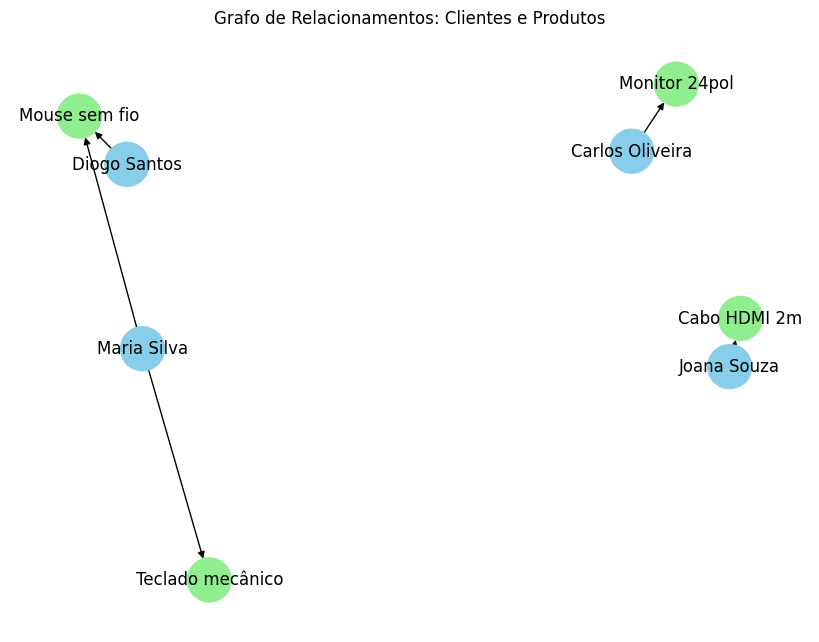

In [6]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

# Cores diferentes para Clientes e Produtos
colors = ['skyblue' if G.nodes[node]['tipo'] == 'cliente' else 'lightgreen' for node in G.nodes()]

nx.draw(G, pos, with_labels=True, node_color=colors, node_size=1000, arrowsize=10)
plt.title("Grafo de Relacionamentos: Clientes e Produtos")
plt.show()